# GitHub Social Network

*Angelina Khatiwada, MSc Data Science and Economics, UNIMI*

Dec, 2020

**Network description**:

A large social network of GitHub developers which was collected from the public API in June 2019. Nodes are developers who have starred at least 10 repositories and edges are mutual follower relationships between them. 

Properties (from project website):

- Undirected graph
- Node features: Yes.
- Edge features: No.
- Node labels: Yes. Binary-labeled.
- Nodes: 37,700
- Edges: 289,003
- Density: 0.001
- Transitvity: 0.013


Source: https://snap.stanford.edu/data/github-social.html

### Dataset import and preprocessing

In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import networkx.algorithms.community as nx_comm
import community as community_louvain
import matplotlib.cm as cm

In [2]:
github = nx.read_edgelist('musae_git_edges.csv',
                                  delimiter=',', 
                                  create_using=nx.Graph(),
                                  nodetype=int)

**Adding node attributes (name, profession)** from a separate csv file. 

Github user is either a web or a machine learning developer (binary classification: 0 and 1). This target feature was derived from the job title of each user.

In [3]:
github_node_features = pd.read_csv("musae_git_target.csv")
github_node_features.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


In [4]:
list_id = github_node_features["id"].to_list() 
list_prof = github_node_features["ml_target"].to_list()
list_name = github_node_features["name"].to_list()

In [5]:
dict_prof = dict(zip(list_id, list_prof))
dict_name = dict(zip(list_id, list_name))

In [6]:
nx.set_node_attributes(github, dict_name, "name")
nx.set_node_attributes(github, dict_prof, "prof")

In [154]:
print('Number of nodes: {} - Number of links: {}'.format(github.order(),github.size()))

Number of nodes: 37700 - Number of links: 289003


**Calculating graph density**

In [10]:
github_density = nx.density(github)
print("Density: " + str(github_density))

Density: 0.0004066878203117068


Graph density is low and indicates the low fraction of existing links between Github users with respect to the possible links.

### Degree Analysis

In [11]:
github_degree = list(dict(github.degree()).values())

In [25]:
print("Github Graph Degree statistics: ")
print("Mean: " + str(np.mean(github_degree)))
print("Median: " + str(np.median(github_degree))) 
print("Standard deviation: " + str(np.std(github_degree)))
print("Maximum: " + str(np.max(github_degree)))
print("Minimum: " + str(np.min(github_degree)))

Github Graph Degree statistics: 
Mean: 15.331724137931035
Median: 6.0
Standard deviation: 80.78703073980464
Maximum: 9458
Minimum: 1


Minimum degree is 1, so there as no isolated nodes.
Mean value is higher that median, so we deal with a scale-free network. To verify this we will check degree distribution and compare it to the random network degree distribution.

### ECDF and ECCDF


Text(0, 0.5, 'ECDF')

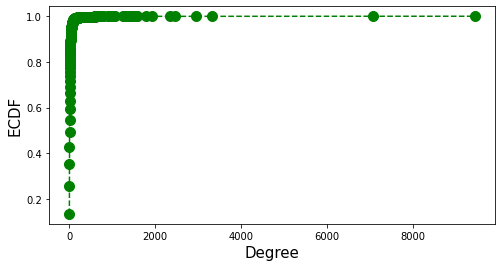

In [152]:
# ECDF in linear scale
cdf_function = ECDF(github_degree)
x = np.unique(github_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,4)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECDF')

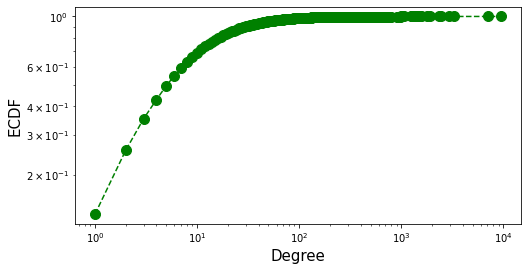

In [15]:
# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,4))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECCDF')

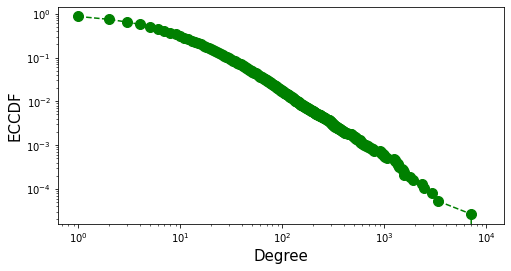

In [16]:
# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECCDF',size = 15)

### Comparison with an Erdos-Renyi random graph G(N, p)

Generating a random graph with the same number of nodes N and the probability of nodes to be randomly linked equal to the graph density.

In [17]:
p = github_density

In [18]:
random_graph = nx.fast_gnp_random_graph(github.order(),p)

In [19]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 37700
Number of links: 288862


Random graph degree statistics and distribution

In [20]:
random_degree = list(dict(random_graph.degree()).values())

In [24]:
print("Random Graph Degree statistics: ")
print("Mean: " + str(np.mean(random_degree)))
print("Median: " + str(np.median(random_degree))) 
print("Standard deviation: " + str(np.std(random_degree)))
print("Maximum: " + str(np.max(random_degree)))
print("Minimum: " + str(np.min(random_degree)))

Random Graph Degree statistics: 
Mean: 15.324244031830238
Median: 15.0
Standard deviation: 3.9281357439893907
Maximum: 35
Minimum: 2


Text(0, 0.5, 'ECDF')

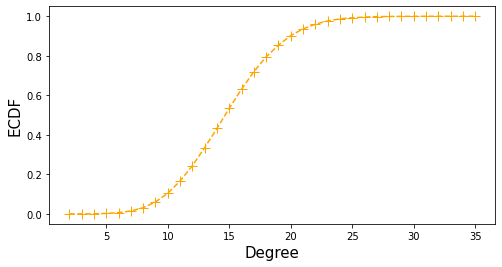

In [31]:
# ECDF Random Graph in linear scale
cdf_function = ECDF(random_degree)
x = np.unique(random_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,4)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'orange', linestyle = '--', marker= '+',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECDF')

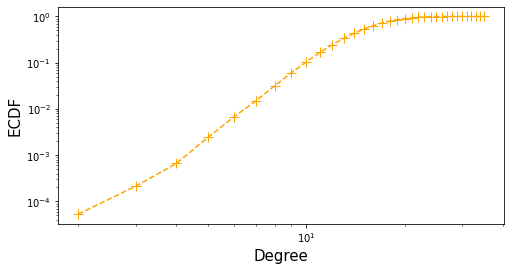

In [32]:
# ECDF Random Graph in loglog scale
fig_cdf_function = plt.figure(figsize=(8,4))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= '+',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECCDF')

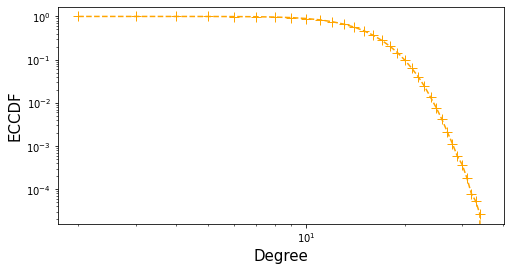

In [33]:
# ECCDF Random Graph in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= '+',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECCDF',size = 15)

Comparing Github network (green) and random graph (yellow) ECCDFs

Text(0, 0.5, 'ECCDF')

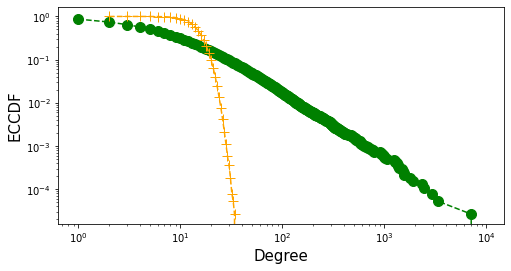

In [57]:
cdf = ECDF(github_degree)
x = np.unique(github_degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=10, color='green', linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, color='orange', linestyle='--')
axes.set_xlabel('Degree',size=15)
axes.set_ylabel('ECCDF', size = 15)

Github graph degree distribution follows Power Law (Heavy Tail distribution) while random graph degree distribution is Poisson distribution. Heavy Tail indicates presence of hubs and the scale-free property of the network.

In random networks all nodes are alike, but in real networks there is a small number of vertices with a high degree level and most of the nodes have a low degree.

 ### Hubs and isolated nodes


In [162]:
percentile_99 = np.percentile(github_degree,99)
print(percentile_99)

138.01000000000204


Nodes that have a degree higher that 138 will be considered as hubs

In [163]:
hub = [k for k,v in dict(github.degree()).items() if v>= percentile_99]
print(len(hub))
print(list(hub))

377
[29982, 21142, 20363, 27803, 18876, 31890, 18562, 33643, 30199, 35773, 11273, 21864, 9051, 26666, 19253, 36652, 10080, 14003, 4793, 23589, 2078, 27450, 19222, 16321, 22666, 36578, 13638, 18850, 1923, 11271, 30002, 7027, 35008, 6229, 20854, 11051, 5629, 33988, 30809, 18638, 31126, 7825, 23838, 8635, 4174, 17787, 23204, 33671, 18163, 29892, 29082, 3922, 34114, 9553, 22321, 15191, 14242, 5300, 33029, 6790, 19358, 30235, 7976, 3712, 32060, 10840, 2431, 5061, 32718, 15554, 3153, 29055, 34606, 35523, 11225, 3491, 31525, 7075, 10001, 6631, 23664, 12505, 15940, 36628, 29886, 22881, 1483, 18701, 25477, 11279, 15074, 7562, 27363, 16119, 22452, 34536, 9677, 31518, 29052, 6301, 10595, 21358, 35388, 5323, 29421, 24347, 6645, 22642, 20236, 25249, 5506, 31917, 6134, 2300, 33471, 37193, 73, 7006, 10830, 4210, 27370, 13656, 24499, 25424, 31659, 33410, 16496, 6005, 11927, 10154, 14400, 31217, 8753, 34774, 15313, 33366, 848, 11573, 9008, 32415, 30670, 28957, 21375, 974, 18406, 8357, 1095, 10403, 3312

In [38]:
print(list(nx.isolates(github)))

[]


There are 377 hubs and no isolated nodes (confirmed by minimum degree = 1) in the network among 37,700 nodes

### Connectivity

In [40]:
print(nx.is_connected(github))
print(nx.number_connected_components(github))

True
1


The network has 1 connected component.

### Transitivity

**Triangles**

Computing the number of triangles. Each triangle is counted three times, once at each node. 

In [42]:
github_triangles_list = list(nx.triangles(github).values())

print('github - list of the number of triangles of all nodes: {}'.format(github_triangles_list))

github - list of the number of triangles of all nodes: [0, 49, 5, 0, 138, 197, 4216, 6315, 2622, 28, 0, 0, 33, 0, 0, 0, 34, 18, 40, 34, 0, 0, 4, 0, 80286, 5, 20, 1544, 63205, 95, 2180, 9, 371, 1828, 2720, 22758, 129, 80, 1467, 5897, 9, 22, 69, 65, 26, 3, 2283, 23, 21, 10675, 348, 478, 9303, 3237, 873, 851, 5, 7, 66, 1, 1, 7, 170, 156, 4, 3226, 14, 5088, 16, 43, 190, 10, 5, 388, 151, 101, 16, 129, 195, 320, 37, 1170, 27873, 2, 29, 11, 7, 155, 25, 659, 119, 286, 4373, 0, 840, 195, 2, 1, 89, 60, 1142, 226, 22, 9, 220, 33, 122, 526, 11, 19762, 1521, 587, 1406, 2, 104, 11, 8049, 9232, 22, 0, 5779, 399, 18, 10, 1290, 60, 12, 1, 2, 2062, 6, 26, 28, 3, 4824, 2, 3835, 29, 270, 424, 276, 29, 2283, 2068, 1053, 133, 2666, 2111, 137, 7, 125, 2107, 4914, 1606, 57, 115, 1063, 15, 120, 492, 337, 0, 1563, 608, 3831, 2707, 791, 0, 32, 403, 2, 4, 671, 3, 393, 522, 1363, 3885, 64, 23, 116, 432, 141, 1522, 2687, 3953, 7221, 167, 69, 456, 17, 0, 23, 3718, 14, 4104, 357, 169, 12, 111, 29, 86, 185, 277, 1000,

In [47]:
print("Triangles statistics: ")
print("Number of triangles (counted for each node): " + str(np.sum(github_triangles_list)))
print("Number of triangles (unique value)): " + str(np.sum(github_triangles_list)/3))
print("Mean number of triangles: " + str(np.mean(github_triangles_list)))
print("Maximum number of triangles: " + str(np.max(github_triangles_list)))
print("Minimum number of triangles: " + str(np.min(github_triangles_list)))

Triangles statistics: 
Number of triangles (counted for each node): 1571430
Number of triangles (unique value)): 523810.0
Mean number of triangles: 41.682493368700264
Maximum number of triangles: 80286
Minimum number of triangles: 0


**Transitivity**

Transitivity is a global custering coefficient, fraction of closed triangles to all possible triangles present in the network. Transitivity of the complete graph is 1.

In [45]:
transitivity=nx.transitivity(github)
print(transitivity)

0.012357188884259466


Transitivity value is low, and it shows a low fraction of closed triangles in the network. 

In general social networks show relatively high values of transitivity

**Local clustering coefficient**

Shows the fraction of triangles that actually exist over all possible triangles in a node's neighborhood

In [46]:
# for all the nodes in the graph
print('github - local clustering: {}'.format(nx.clustering(github)))

github - local clustering: {0: 0, 23977: 0.09879032258064516, 1: 0.17857142857142858, 34526: 0, 2370: 0.17692307692307693, 14683: 0.03539982030548068, 29982: 0.03533474135908009, 21142: 0.026643770884666015, 20363: 0.03204987165383205, 23830: 0.049910873440285206, 34035: 0, 6067: 0, 19720: 0.044534412955465584, 20183: 0, 3: 0, 4950: 0, 18029: 0.08374384236453201, 3358: 0.09473684210526316, 34935: 0.09852216748768473, 5916: 0.19883040935672514, 4: 0, 2865: 0, 9342: 0.19047619047619047, 5: 0, 27803: 0.0031992738015873237, 6: 0.3333333333333333, 18612: 0.11695906432748537, 18876: 0.03397064971067743, 31890: 0.001413281690619859, 17647: 0.06168831168831169, 18562: 0.0356938190749079, 7: 0.32142857142857145, 37493: 0.06794871794871794, 33643: 0.012845106843462557, 30199: 0.012246129187658423, 35773: 0.00412071645929095, 11273: 0.011858797573083288, 12775: 0.31620553359683795, 21864: 0.032928553792283, 9051: 0.003654321171266637, 34957: 0.32142857142857145, 21395: 0.1437908496732026, 9891: 0

In [48]:
print('github - average local clustering: {}'.format(nx.average_clustering(github)))

github - average local clustering: 0.16753704480107323


In [49]:
print("Local Clustering Coefficient statistics: ")
print('github - mean local clustering: {}'.format(np.mean(list(nx.clustering(github).values()))))
print('github - standard deviation local clustering: {}'.format(np.std(list(nx.clustering(github).values()))))
print('github - median local clustering: {}'.format(np.median(list(nx.clustering(github).values()))))
print('github - max local clustering: {}'.format(np.max(list(nx.clustering(github).values()))))
print('github - min local clustering: {}'.format(np.min(list(nx.clustering(github).values()))))

Local Clustering Coefficient statistics: 
github - mean local clustering: 0.1675370448010758
github - standard deviation local clustering: 0.22516458177272095
github - median local clustering: 0.1
github - max local clustering: 1.0
github - min local clustering: 0.0


Average local clustering coefficient is 0.1675 and shows that nodes tend to form triads in the neighborhood.

We can explore the local clustering coefficient distribution

In [51]:
local_clustering_github = list(nx.clustering(github).values())

Text(0, 0.5, 'ECDF')

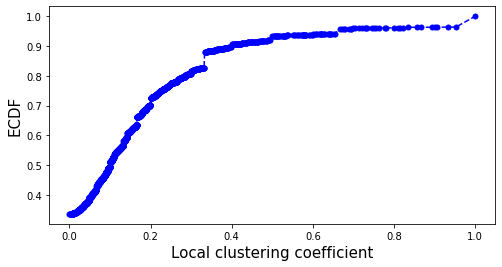

In [58]:
# ECDF in linear scale
cdf_function = ECDF(local_clustering_github)
x = np.unique(local_clustering_github)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,4)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'blue', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Local clustering coefficient',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECDF')

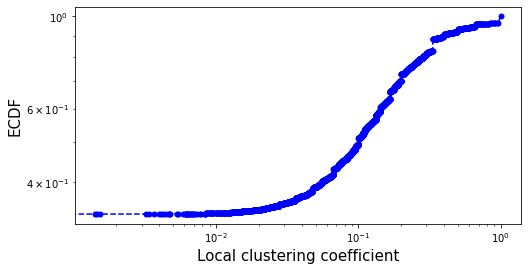

In [60]:
# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,4))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'blue', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Local clustering coefficient',size = 15)
axes.set_ylabel('ECDF',size = 15)

Text(0, 0.5, 'ECCDF')

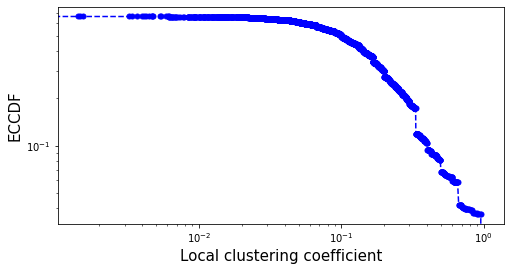

In [63]:
# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'blue', linestyle = '--', marker= 'o',ms = 5)
axes.set_xlabel('Local clustering coefficient',size = 15)
axes.set_ylabel('ECCDF',size = 15)

There is a number of nodes with a very high local clustering coefficient, but most of the nodes have the value below 0.3 (close to the average local clustering coefficient of 1.675

In [190]:
print("Pearson coefficient and p-value between Degree and Clustering coefficient: ")
print(scipy.stats.pearsonr(github_degree, local_clustering_github))

Pearson coefficient and p-value between Degree and Clustering coefficient: 
(-0.046342409699141884, 2.2042105023712667e-19)


### Centrality

Degree centrality, Eigenvector centrality and PageRank are computed as the most relevant and efficient mesaures of centrality.

Betweenness and Closeness cenrality cause some computational issues, therefore, are not computed for the Github graph.

**Degree centrality** of the node is a fraction of nodes it is connected to.

In [85]:
degree_centrality = nx.degree_centrality(github)

**Eigenvector centrality** is a measure of the influence of a node in a network. 

In [73]:
eigenvector_centrality = nx.eigenvector_centrality(github)

**PageRank** is an adjustment of Katz centrality (eigenvector centrality) and determines the importance (ranking) of the nodes.

In [155]:
pr_centrality = nx.pagerank_scipy(github)

In [86]:
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_pagerank = sorted(pr_centrality.items(),key = lambda x:x[1], reverse=True)[0]

print('degree:      ',hub_degree)
print('eigenvector: ',hub_eigenvector)
print('pagerank: ',hub_eigenvector)

degree:       (31890, 0.25088198625958247)
eigenvector:  (31890, 0.35594895516626784)
pagerank:  (31890, 0.35594895516626784)


**Correlation** between centralities

Pearson correlation coefficient and p-value. The Pearson correlation coefficient measures the linear relationship between two variables.

In [166]:
print("Pearson coefficient and p-value between Degree and Eigenvector Centralities: ")
print(scipy.stats.pearsonr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print("------")
print("Pearson coefficient and p-value between Degree and PageRank Centralities: ")
print(scipy.stats.pearsonr(list(degree_centrality.values()),list(pr_centrality.values())))
print("------")
print("Pearson coefficient and p-value between Eigenvector and PageRank Centralities: ")
print(scipy.stats.pearsonr(list(eigenvector_centrality.values()),list(pr_centrality.values())))

Pearson coefficient and p-value between Degree and Eigenvector Centralities: 
(0.857781088272029, 0.0)
------
Pearson coefficient and p-value between Degree and PageRank Centralities: 
(0.9952821864675607, 0.0)
------
Pearson coefficient and p-value between Eigenvector and PageRank Centralities: 
(0.8262361098368681, 0.0)


Rank correlation: Spearman and Kendall coefficient

In [165]:
print("Spearman and Kendall coefficient between Degree and Eigenvector Centralities: ")
print(scipy.stats.spearmanr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print("------")
print("Spearman and Kendall coefficient between Degree and PageRank Centralities: ")
print(scipy.stats.kendalltau(list(degree_centrality.values()),list(pr_centrality.values())))
print("------")
print("Spearman and Kendall coefficient between Eigenvector and PageRank Centralities: ")
print(scipy.stats.kendalltau(list(eigenvector_centrality.values()),list(pr_centrality.values())))

Spearman and Kendall coefficient between Degree and Eigenvector Centralities: 
SpearmanrResult(correlation=0.7550765031068206, pvalue=0.0)
------
Spearman and Kendall coefficient between Degree and PageRank Centralities: 
KendalltauResult(correlation=0.889249324690445, pvalue=0.0)
------
Spearman and Kendall coefficient between Eigenvector and PageRank Centralities: 
KendalltauResult(correlation=0.4912125697705139, pvalue=0.0)


High degree of correlation between all types of centralities.

### Assortativity

**Assortativity for nominal attributes**

Assortativity coefficient is based on Github users' profession feature

In [93]:
print(nx.attribute_assortativity_coefficient(github,"prof")) 

0.3778215022223345


Assortativity coefficient (network modularity) is positive and high enough, so the network is assortative.
Assortativity coefficient range is [-1;1].

There is a higher probability that similar nodes will be linked than nodes in a random network with the same number of nodes, links and nodes degree. 

Links are more likely to form between the nodes of the same type. Web developers are more likely to connect to Web developers and ML developers are more likely to other ML developers on Github.


**Degree assortativity**

In [94]:
print("Degree assortativity: " + str(nx.degree_assortativity_coefficient(github)))

Degree assortativity: -0.07521713413904516


The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes.
Negative value of degree assortativity coefficient indicates a correlation between nodes of different degree. The coefficient is close to 0.

### Community detection

We will apply Louvain method for community detection. Greedy implementation is not efficient in this case. The network is large, so that we do not use Greedy implementation.

In [122]:
partition_library = community_louvain.best_partition(github)

In [123]:
print(set(partition_library.values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [124]:
nx.set_node_attributes(github, partition_library, "community_library")

**Evaluating communities**

In [125]:
comms = set(partition_library.values())

In [126]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [127]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

print(list_community_sets_library) #nodes are within the communities

[{0, 32773, 6, 8199, 24582, 10, 16396, 32783, 8208, 17, 18, 19, 24593, 21, 8214, 24596, 24, 32793, 8216, 8219, 32792, 16421, 38, 32806, 24616, 32814, 8238, 16433, 32818, 16435, 52, 53, 24628, 8250, 24636, 8256, 32836, 24644, 70, 69, 8260, 32838, 8266, 32845, 16461, 16, 24661, 24663, 91, 24668, 8284, 16476, 8285, 32860, 97, 98, 8290, 32862, 32871, 32874, 32875, 24684, 32877, 24682, 24688, 32880, 8314, 16507, 32892, 16508, 16509, 127, 16517, 8328, 32904, 32905, 139, 140, 32907, 16525, 32911, 8336, 32913, 24713, 32915, 148, 32921, 154, 8346, 24733, 16544, 32929, 162, 164, 16549, 16550, 32933, 32944, 24754, 32947, 16568, 185, 16570, 8376, 188, 16571, 16574, 8382, 8383, 32959, 8387, 24772, 16582, 24775, 32970, 8396, 32972, 24783, 209, 8404, 32981, 8406, 8408, 8409, 24793, 24794, 223, 8416, 16608, 8415, 33000, 24810, 8426, 236, 8429, 33004, 24815, 240, 245, 8441, 16638, 24831, 260, 33029, 261, 16644, 8456, 33032, 8458, 8457, 16647, 16653, 16648, 16650, 16656, 274, 275, 16661, 16663, 24856, 2

In [128]:
#print("Coverage")
print("Coverage", nx_comm.coverage(github, list_community_sets_library))
#print("Modularity")
print("Modularity", nx_comm.modularity(github, list_community_sets_library, weight='weight'))
#print("Performance")
#print("Performance", nx_comm.performance(G, my_list))

Coverage 0.6157133316955188
Modularity 0.4586301309996907


Exploring size distribution of communities

In [131]:
pairs = []
for i, nodes in enumerate(list_community_sets_library):
    print(i,len(nodes))
    comm_size = (i,len(nodes))
    pairs.append(comm_size)

0 4419
1 6336
2 7640
3 752
4 4326
5 456
6 7523
7 311
8 2213
9 379
10 2296
11 410
12 530
13 13
14 6
15 6
16 13
17 3
18 5
19 5
20 8
21 5
22 3
23 3
24 3
25 15
26 4
27 4
28 3
29 4
30 3
31 3


In [132]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes) 

Text(0, 0.5, 'Number of nodes')

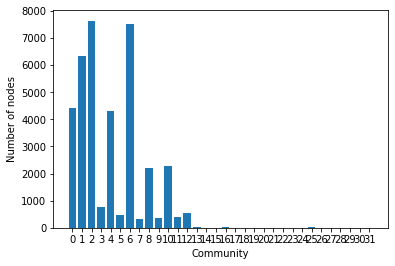

In [134]:
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

Exploring the consistency of the profession attritute within communities. Computing percentage of the ML developer in each community

In [181]:
map_comm_count = []
for i, nodes in enumerate(list_community_sets_library):
    count_ml = 0
    for n in nodes:
        prof = github.nodes[n]["prof"]
        count_ml += prof
    percent = count_ml/len(nodes)
    print(i, percent, len(nodes))

0 0.14482914686580675 4419
1 0.19633838383838384 6336
2 0.7022251308900523 7640
3 0.49867021276595747 752
4 0.10957004160887657 4326
5 0.15789473684210525 456
6 0.05317027781470158 7523
7 0.2829581993569132 311
8 0.09353818346136467 2213
9 0.12928759894459102 379
10 0.26698606271777003 2296
11 0.24146341463414633 410
12 0.16037735849056603 530
13 0.23076923076923078 13
14 1.0 6
15 0.5 6
16 0.0 13
17 0.0 3
18 0.4 5
19 0.2 5
20 0.375 8
21 0.4 5
22 1.0 3
23 0.0 3
24 0.0 3
25 0.0 15
26 0.0 4
27 0.0 4
28 0.6666666666666666 3
29 0.75 4
30 0.0 3
31 0.0 3


For large communities there is  either a high percent of ML developers (community 2, size 7640, 0.702) or a low percent(community 1, size 6336, 0.196) which indicates a clear separation between ML and Web developers. The nodes of the same type tend to form communities.

**Centrality in communities**

In [182]:
for comm in list_community_sets_library:
    subgraph = github.subgraph(comm)
    print(subgraph.order())

4419
6336
7640
752
4326
456
7523
311
2213
379
2296
410
530
13
6
6
13
3
5
5
8
5
3
3
3
15
4
4
3
4
3
3


In [136]:
centr_comm = {}
# node -> centrality in the community subgraph

In [167]:
for comm in list_community_sets_library:
    subgraph = github.subgraph(comm)
    subgraph.order()
    nx.degree_centrality(subgraph)
    
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d

Nodes' centrality in the communities

In [144]:
centr_comm 

{0: 0.00022634676324128565,
 32773: 0.0009053870529651426,
 24582: 0.0004526935264825713,
 6: 0.000679040289723857,
 8199: 0.00022634676324128565,
 10: 0.005658669081032141,
 16396: 0.00022634676324128565,
 32783: 0.0004526935264825713,
 8208: 0.000679040289723857,
 17: 0.0004526935264825713,
 18: 0.0004526935264825713,
 19: 0.0033952014486192846,
 24593: 0.007016749660479855,
 21: 0.0036215482118605704,
 8214: 0.00022634676324128565,
 24596: 0.000679040289723857,
 8216: 0.0004526935264825713,
 24: 0.002489814395654142,
 32793: 0.002037120869171571,
 8219: 0.0004526935264825713,
 32792: 0.0004526935264825713,
 16421: 0.00022634676324128565,
 38: 0.012901765504753282,
 32806: 0.0029425079221367134,
 24616: 0.002716161158895428,
 32814: 0.0011317338162064282,
 8238: 0.0015844273426889996,
 16433: 0.0004526935264825713,
 32818: 0.0011317338162064282,
 16435: 0.0004526935264825713,
 52: 0.0061113626075147125,
 53: 0.00022634676324128565,
 24628: 0.0004526935264825713,
 8250: 0.000452693526

In [145]:
nx.set_node_attributes(github, centr_comm, "centr_comm")

Checking the existence of bridges

In [149]:
nx.has_bridges(github)

True

Writing graph for Gephi

In [151]:
nx.write_gexf(github, "github_graph.gexf")